## Introduction to neural network classification with TensorFlow
In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

Binary classification
Mutliclass classification
Multilabel classification

### Creating data to view and fit


In [2]:
import tensorflow as tf
from sklearn.datasets import make_circles
samples=1000
x, y = make_circles(n_samples=samples, noise=0.03, random_state=42)
x[:30], y[:30]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905],
        [-0.64249042, -0.54409929],
        [ 0.5694666 ,  0.84476776],
        [-0.11773591,  0.83140071],
        [ 0.73410004, -0.33316553],
        [ 0.60077633, -0.58742632],
        [ 0.19022571, -0.76341003],
        [-0.93695185, -0.3434314 ],
        [ 0.1070617 , -0.7930922 ],
        [-0.81891362, -0.10162399],
        [-0.64210013, -0.74537441],
        [ 0.6268272 ,  0.45004698],
        [-0.56229136,  0.85375906],
        [-0.02126666, -0.99627531],
        [ 0.73977058,  0.27837025],
        [-0.90904839,  0.45724363],
        [-0.93699411,  0.19944235],
        [ 0.28661578,  0.97973871],
        [ 0.82626072, -0.153

We can see that this is **not a multiclass classification** problem because the target variable `y` contains only two unique values: **0 and 1**.  
It is also **not a multilabel classification** problem since **each sample has only one label** (either 0 or 1, not multiple labels at once).  

Therefore, this dataset represents a **binary classification problem**, where the goal is to classify each point as belonging to one of two classes (the inner or outer circle).


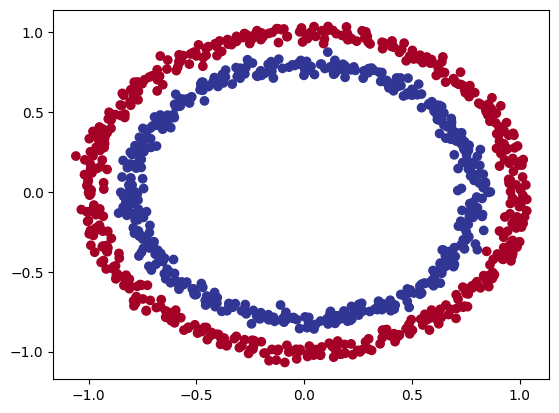

In [8]:
#lets see how the data looks like
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)

Cool ! our goal now is to build a model that separates ( classify ) the red and the bleu points

### 🧩 Understanding the `make_circles()` Dataset

The `make_circles()` dataset is a **synthetic (toy) dataset**, not real-world data. It’s mainly used for **learning and experimentation**, especially to test how well machine learning models handle **non-linear data**. It generates two concentric circles—an inner circle (label = 0) and an outer circle (label = 1)—which are **not linearly separable**, meaning a straight line (like in Logistic Regression) cannot correctly divide them. This dataset is useful for visualizing and understanding **when linear models fail** and why we need **non-linear transformations**, **kernel methods**, or **neural networks**. In short, you’re not learning to classify circles, but rather to **see how models learn complex decision boundaries** in non-linear problems.


In [5]:
#lets see the input and output shapes
x.shape, y.shape

((1000, 2), (1000,))

In [6]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), np.int64(1))

### Steps in modelling
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

* Creating a model - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
* Compiling a model - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
* Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [7]:
# set the random seed
tf.random.set_seed(42)
# 1. Create a model from the Sequential API
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
# 3. Fit the model
model1.fit(x, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4920 - loss: 6.4094
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4960 - loss: 6.4319
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0670
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0639
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 8.0618


Looking at the accuracy metric, our model performs poorly (around 50% accuracy on a binary classification problem is the equivalent of guessing), but what if we trained it for longer?


In [8]:
#lets try to train the model for longer
model1.fit(x, y, epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 8.0607
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0600
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0596
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0594
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5000 - loss: 8.0593
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0592
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 8.0592
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0591
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5000 - loss: 8.0591
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 8.0591
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0591
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy

In [9]:
model1.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5000 - loss: 8.0590 


[8.059046745300293, 0.5]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [10]:
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
model2.fit(x, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4710 - loss: 5.4939
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4720 - loss: 4.3266
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5140 - loss: 1.0125
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4960 - loss: 0.7101
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4920 - loss: 0.7048
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4920 - loss: 0.7016
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4940 - loss: 0.6994
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4950 - loss: 0.6979
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4960 - loss: 0.6969
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4970 - loss: 0.6962
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4960 - loss: 0.6956
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

Still not even as good as guessing (~50% accuracy)... hmm...?

Let's remind ourselves of a couple more ways we can use to improve our models ( see the 02-4 image).
To improve our model, we can alter almost every part of the 3 steps we went through before.

Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
Compiling a model - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer).

In [4]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model3 = tf.keras.Sequential([

  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model3.fit(x, y, epochs=100) # fit for 100 passes of the data

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4640 - loss: 2.5668
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4960 - loss: 0.7021
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4920 - loss: 0.6969
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4760 - loss: 0.6945
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4660 - loss: 0.6947
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4680 - loss: 0.6950
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4680 - loss: 0.6951
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4660 - loss: 0.6953
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4680 - loss: 0.6954
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4690 - loss: 0.6956
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4720 - loss: 0.6957
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [5]:
model3.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4870 - loss: 0.6947


[0.6946918964385986, 0.4869999885559082]

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

you may be wondering (we said that the more the loss is close to 0 the more our model is doing great , here the loss is very close to 0 but the accurancy is awful , how can this be possible ? )

bah , 
A low binary-crossentropy loss does not always mean high accuracy. Loss is a continuous measure that penalizes the model based on how close its predicted probabilities are to the true labels, while accuracy is a discrete metric that only checks whether a prediction crosses the 0.5 threshold. This means a model can output values near 0.49 or 0.51 for all samples: the loss will be low because these predictions are close to the targets, but accuracy will be poor because they fall on the wrong side of the threshold. This situation usually happens when the final layer does not use a sigmoid activation (or the loss is not set with from_logits=True), causing the model to output raw values instead of proper probabilities.

In [6]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classifcation...


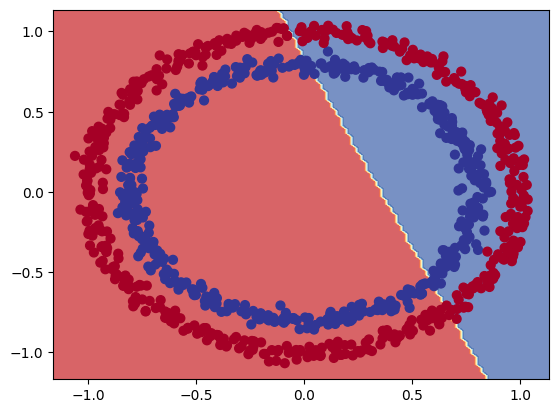

In [9]:
plot_decision_boundary(model3, x , y)


even after three tries to improve our model it still gives bad accurancy
!!!! 
Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work